<a href="https://colab.research.google.com/github/raleight1/Forecasting-Nonseasonal-and-Seasonal/blob/main/Seasonal_Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Milestone 1**

**Data Source and Background**

The dataset contains monthly historical stock price data for Advanced Micro Devices (AMD), a prominent semiconductor company. The data spans from March 2018 to February 2025, providing a comprehensive view of AMD's stock performance over this period.

**Key Attributes:**

**Date:** The end-of-month date for each recorded stock price (e.g., "31-Jan-25").

**Price:** The closing stock price of AMD at the end of the respective month (e.g., 109.54 on 28-Feb-25).

**Preprocessing Observations:**

1 - The dataset is structured with the primary columns being Date and Price. The additional empty columns (denoted by ,,,,,) suggest the data may have been extracted from a broader source or formatted for compatibility with specific tools.

2 - The dates are consistently formatted as "DD-MMM-YY," making them easily interpretable.

3 - The Price column appears to be clean, with no missing values or obvious outliers in the provided data.

4 - The data is ordered in reverse chronological order (most recent date first), which is typical for financial datasets.

**Potential Use Cases:**

- Trend analysis of AMD's stock performance over time.

- Volatility assessment and risk analysis.

- Comparative studies with other semiconductor stocks or market indices.

- Predictive modeling for future stock prices based on historical trends.

This dataset is valuable for investors, financial analysts, and researchers interested in AMD's market behavior.






In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error #Measures the average squared difference between actual and predicted values.
#Measures the average absolute difference between actual and predicted values.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #Visualises the correlation of a time series with its past values.
#PACF (partail) Helps identify the lag order for ARIMA/SARIMA models.
from statsmodels.stats.diagnostic import acorr_ljungbox # Performs the Ljung-Box test, which checks whether residuals (errors) in a time series model are white noise.
from statsmodels.tsa.statespace.sarimax import SARIMAX #A Seasonal Autoregressive Integrated Moving Average (SARIMA) model used for time series forecasting.
from statsmodels.tsa.arima_process import ArmaProcess #Simulates ARMA (AutoRegressive Moving Average) processes for testing time series models.
from statsmodels.graphics.gofplots import qqplot #Creates a Quantile-Quantile plot, which compares a dataset’s distribution to a normal distribution.
from statsmodels.tsa.stattools import adfuller #Runs the Augmented Dickey-Fuller (ADF) test to check if a time series is stationary.
from tqdm import tqdm_notebook #Displays a progress bar for loops.
from itertools import product #Generates all possible combinations of a set of parameters (used for hyperparameter tuning in time series models).
from typing import Union #Allows defining function arguments that accept multiple data types.

import matplotlib.pyplot as plt #Creates plots for data visualization.
import numpy as np #Handles numerical operations, arrays, and functions.
import pandas as pd #Handles data manipulation and analysis (DataFrames and Series).

import warnings #Suppresses warning messages (keeps note book clean)

warnings.filterwarnings('ignore')

%matplotlib inline

In [22]:
#We have the csv file saved and upload it into the runtime to access the data
data = 'AMD Monthly Historical Data(Sheet1).csv'

df = pd.read_csv(data) #loads this CSV file into a Pandas DataFrame.
df.head() #prints the first 5 rows of the DataFrame to check if the data loaded correctly.

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,28-Feb-25,109.54,NaN,NaN,NaN,NaN,NaN
1,31-Jan-25,99.86,NaN,NaN,NaN,NaN,NaN
2,31-Dec-24,115.95,NaN,NaN,NaN,NaN,NaN
3,30-Nov-24,120.79,NaN,NaN,NaN,NaN,NaN
4,31-Oct-24,137.18,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.iloc[:,0:2] #selects only first 2 rows
df.head() #prints the first 5 rows of the DataFrame to check if the data loaded correctly.

,Date,Price
0,28-Feb-25,109.54
1,31-Jan-25,99.86
2,31-Dec-24,115.95
3,30-Nov-24,120.79
4,31-Oct-24,137.18


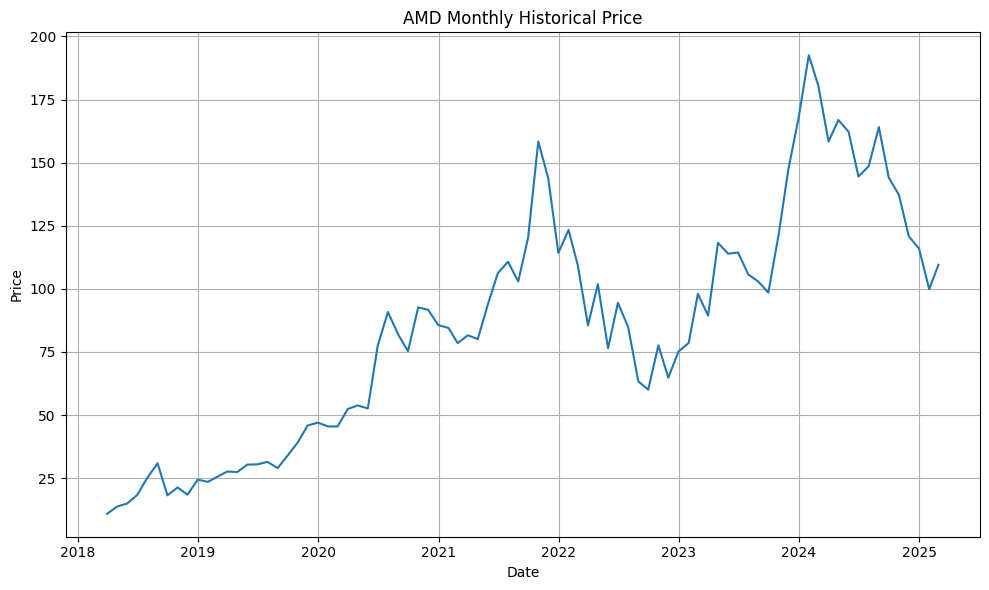

In [10]:
# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Create the timeseries plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.plot(df['Date'], df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AMD Monthly Historical Price')
plt.tight_layout()
plt.grid(True)
plt.show()


**Milestone 2**

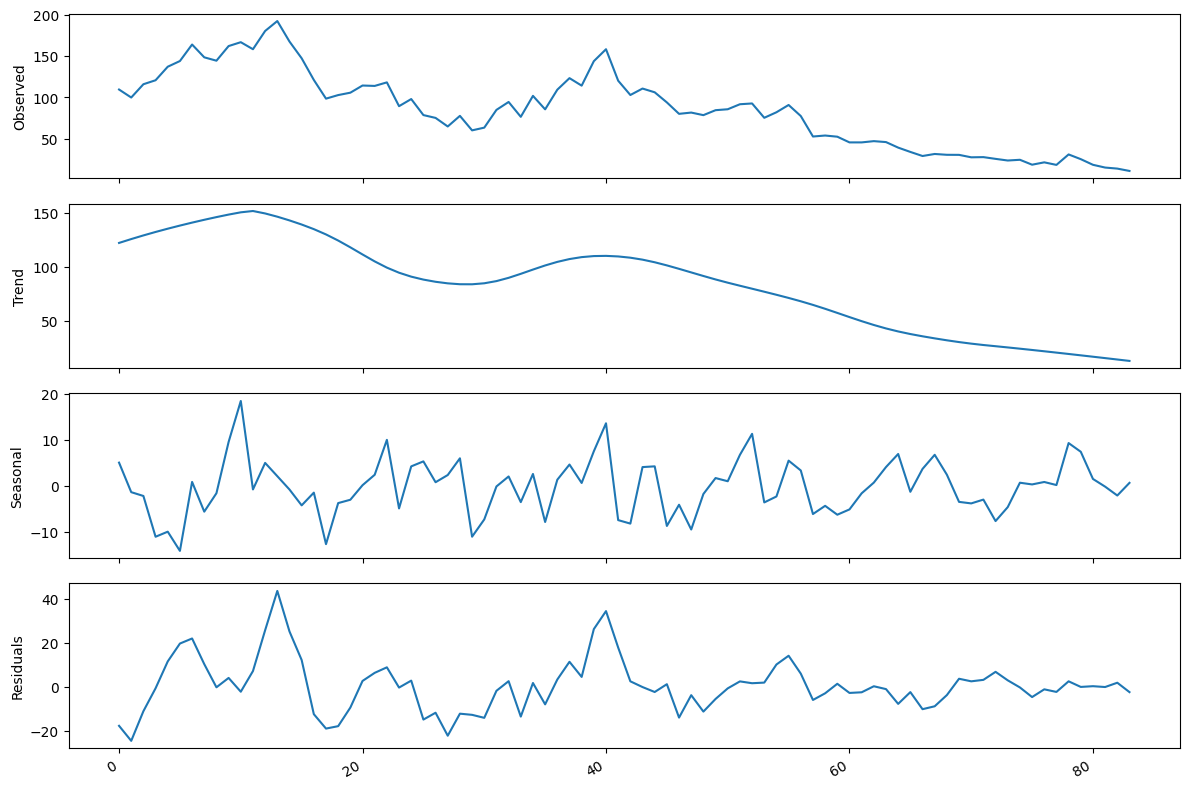

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
decomposition = STL(df['Price'], period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

fig.autofmt_xdate()
plt.tight_layout()

In [12]:
ad_fuller_result = adfuller(df['Price'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -0.8498022030570822
p-value: 0.8040537586961589


In [11]:
df_diff = np.diff(df['Price'])

In [13]:
ad_fullerDiff_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fullerDiff_result[0]}')
print(f'p-value: {ad_fullerDiff_result[1]}')

ADF Statistic: -9.089694072638611
p-value: 3.854133140432175e-15


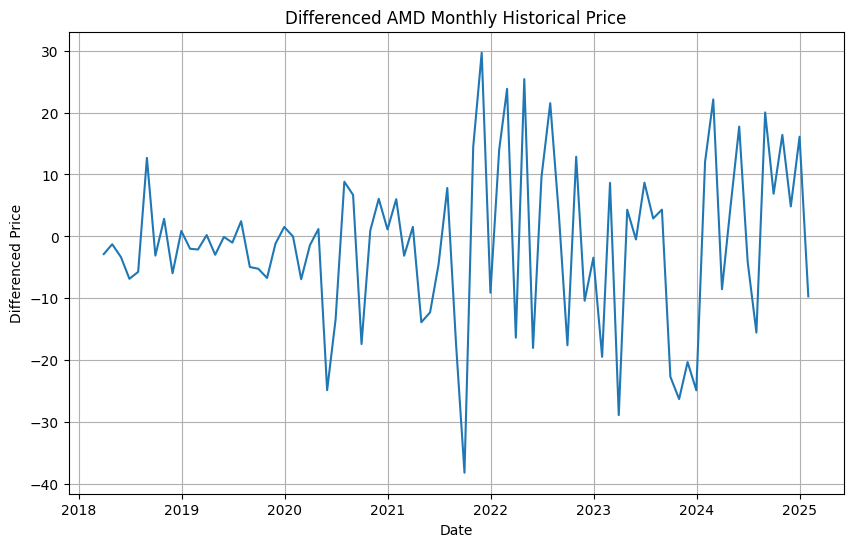

In [15]:
#Create a plot of transformed data to show stationarity
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][1:], df_diff)  # Plot starting from the second date
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.title('Differenced AMD Monthly Historical Price')
plt.grid(True)
plt.show()


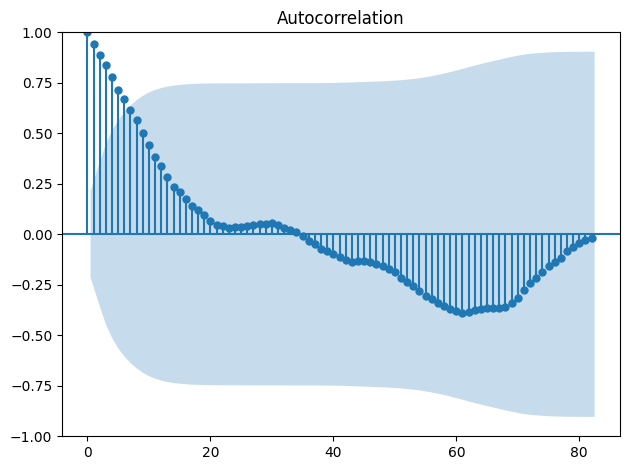

In [23]:
plot_acf(df['Price'], lags=82);

plt.tight_layout()

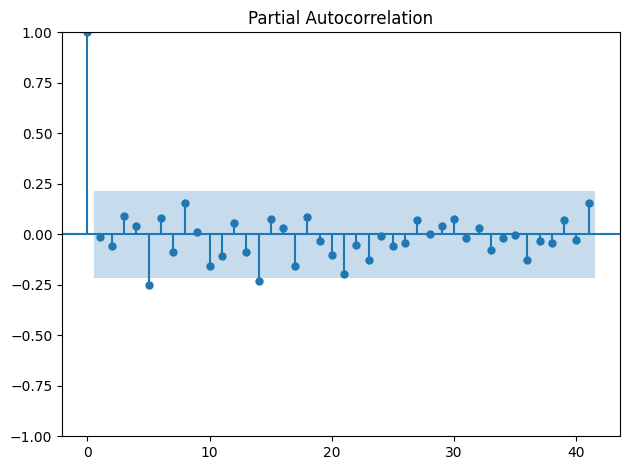

In [24]:
plot_pacf(df_diff, lags=41);

plt.tight_layout()

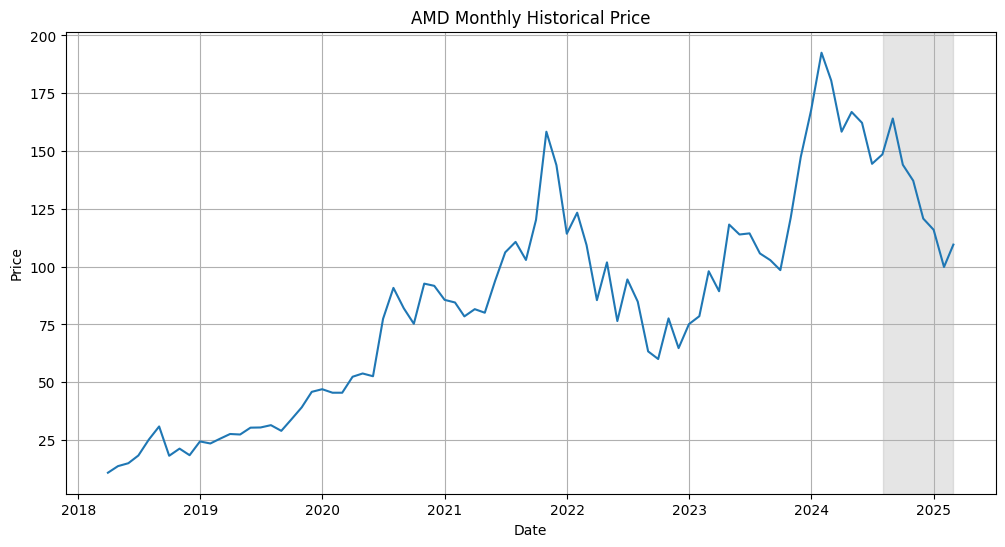

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('AMD Monthly Historical Price')
train_end = pd.to_datetime('2024-08-01')
test_end = pd.to_datetime('2025-02-28')
plt.axvspan(train_end, test_end, color='#808080', alpha=0.2)
plt.grid(True)
plt.show()

In [20]:
def optimize_ARIMA(training_data, order_list, d) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(training_data, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
            no_pars = order[0]+order[1]
        except:
            continue

        aic = model.aic
        bic= model.bic
        results.append([order, no_pars, aic, bic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'NO. Parameters', 'AIC','BIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df